In [3]:
import pandas as pd
# import hvplot.pandas
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


In [4]:
crypto_df = pd.read_csv('crypto_data.csv', index_col=0)
# print(df.shape)

In [5]:
# Only keep cryptocurrencies that are trading
crypto_df = crypto_df.loc[crypto_df['IsTrading'] == True]
print(crypto_df.shape)

(1144, 6)


In [6]:
# Delete 'IsTrading' column
crypto_df = crypto_df.drop(columns = 'IsTrading')
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [7]:
# Remove rows with at least 1 null value
# crypto_df.isnull().sum()
crypto_df = crypto_df.dropna()
crypto_df.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [8]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] != 0]
print(crypto_df.shape)

(533, 5)


In [9]:
# Store the 'CoinName' in its own DataFrame prior to dropping from crypto_df 
coinname_df = pd.DataFrame(data = crypto_df, columns = ['CoinName'])
coinname_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [10]:
# Drop 'CoinName' from crypto_df
crypto_df = crypto_df.drop(columns = 'CoinName')
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [11]:
# Create dummy variables for text features with get_dummies
crypto_dummies= pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
crypto_dummies.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Standardize data
crypto_scaled = StandardScaler().fit_transform(crypto_dummies)
print(crypto_scaled[0:1])

[[-0.11674788 -0.15286468 -0.0433555  -0.0433555  -0.0433555  -0.06137164
  -0.07523548 -0.0433555  -0.06137164 -0.06137164 -0.0433555  -0.0433555
  -0.19226279 -0.06137164 -0.09731237 -0.0433555  -0.11536024 -0.07523548
  -0.0433555  -0.0433555  -0.15176505 -0.0433555  -0.13105561 -0.0433555
  -0.0433555  -0.08695652 -0.0433555  -0.0433555  -0.0433555  -0.0433555
  -0.06137164 -0.0433555  -0.08695652 -0.08695652 -0.08695652 -0.0433555
  -0.13105561 -0.13827675 -0.13827675 -0.0433555  -0.06137164 -0.0433555
  -0.07523548 -0.1815096  -0.0433555  -0.0433555  -0.0433555  -0.07523548
  -0.15811388 -0.3145935  -0.0433555  -0.08695652 -0.07523548 -0.06137164
  -0.0433555   1.38873015 -0.0433555  -0.0433555  -0.06137164 -0.0433555
  -0.0433555  -0.0433555  -0.0433555  -0.0433555  -0.0433555  -0.0433555
  -0.0433555  -0.39836623 -0.0433555  -0.1815096  -0.0433555  -0.08695652
  -0.08695652 -0.10670145 -0.0433555  -0.0433555  -0.13105561 -0.0433555
  -0.0433555  -0.0433555  -0.0433555  -0.07523

In [13]:
# Use PCA to reduce dimensions to 3 principal components
crypto_scaled = crypto_scaled[~np.isnan(crypto_scaled).any(axis=1)]
np.isnan(crypto_scaled).sum()
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(crypto_scaled)

# Create a DataFrame with the principal components data
pca_df = pd.DataFrame(
    data=crypto_pca
)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.333759,1.010335,-0.645813,0.009061,-3.687231e-14,-3.727247e-14,-6.027263e-15,1.312786e-14,0.000677,-1.313000,...,-2.370824e-16,1.843449e-15,1.650836e-15,-2.293573e-16,1.247463e-15,1.420601e-15,2.941452e-16,4.590514e-15,1.530750e-15,-1.329949e-15
1,-0.317078,1.010467,-0.646245,0.009004,-3.709659e-14,-3.727740e-14,-6.368659e-15,1.307580e-14,0.000074,-1.315755,...,-2.043360e-16,1.876163e-15,1.163775e-15,-4.035070e-16,1.025763e-15,1.438778e-15,1.725831e-16,4.268547e-15,1.917471e-15,-1.127430e-15
2,2.308741,1.636182,-0.741287,0.027146,-5.582923e-14,-5.848241e-14,-2.020621e-14,2.407862e-14,-0.049574,-1.540532,...,-3.361901e-14,-7.795650e-14,5.378254e-14,-5.109127e-14,-4.612535e-14,-1.027639e-13,-1.170283e-14,-4.765712e-14,-6.587804e-14,4.950019e-14
3,-0.144347,-1.318206,0.216681,-0.007076,1.444299e-14,1.456521e-14,4.414564e-15,-7.001321e-15,-0.003528,0.282703,...,-1.840776e-14,-1.160516e-14,-4.096213e-15,-1.216128e-14,-3.179778e-15,-3.021858e-14,1.266150e-14,3.171020e-15,-7.362618e-15,2.406557e-15
4,-0.151002,-2.029159,0.440925,-0.010285,2.662268e-14,2.833718e-14,1.190146e-14,-1.209696e-14,0.024224,0.520040,...,-8.376456e-15,-8.798093e-14,-1.254332e-13,-7.941045e-14,1.416899e-13,-9.805500e-14,5.932188e-14,2.024058e-13,5.632119e-14,-8.356267e-15


In [14]:
# reduce dimensions of pricipal components with t-SNE
tsne_inp = np.array(pca_df)
model = TSNE(n_components=2, n_iter=5000, perplexity=30.0)
tsne_features = model.fit_transform(tsne_inp)  
result = tsne_features.tolist()

tSNE_df = pd.DataFrame(
    data=tsne_features
)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.333759,1.010335,-0.645813,0.009061,-3.687231e-14,-3.727247e-14,-6.027263e-15,1.312786e-14,0.000677,-1.313000,...,-2.370824e-16,1.843449e-15,1.650836e-15,-2.293573e-16,1.247463e-15,1.420601e-15,2.941452e-16,4.590514e-15,1.530750e-15,-1.329949e-15
1,-0.317078,1.010467,-0.646245,0.009004,-3.709659e-14,-3.727740e-14,-6.368659e-15,1.307580e-14,0.000074,-1.315755,...,-2.043360e-16,1.876163e-15,1.163775e-15,-4.035070e-16,1.025763e-15,1.438778e-15,1.725831e-16,4.268547e-15,1.917471e-15,-1.127430e-15
2,2.308741,1.636182,-0.741287,0.027146,-5.582923e-14,-5.848241e-14,-2.020621e-14,2.407862e-14,-0.049574,-1.540532,...,-3.361901e-14,-7.795650e-14,5.378254e-14,-5.109127e-14,-4.612535e-14,-1.027639e-13,-1.170283e-14,-4.765712e-14,-6.587804e-14,4.950019e-14
3,-0.144347,-1.318206,0.216681,-0.007076,1.444299e-14,1.456521e-14,4.414564e-15,-7.001321e-15,-0.003528,0.282703,...,-1.840776e-14,-1.160516e-14,-4.096213e-15,-1.216128e-14,-3.179778e-15,-3.021858e-14,1.266150e-14,3.171020e-15,-7.362618e-15,2.406557e-15
4,-0.151002,-2.029159,0.440925,-0.010285,2.662268e-14,2.833718e-14,1.190146e-14,-1.209696e-14,0.024224,0.520040,...,-8.376456e-15,-8.798093e-14,-1.254332e-13,-7.941045e-14,1.416899e-13,-9.805500e-14,5.932188e-14,2.024058e-13,5.632119e-14,-8.356267e-15


<AxesSubplot:>

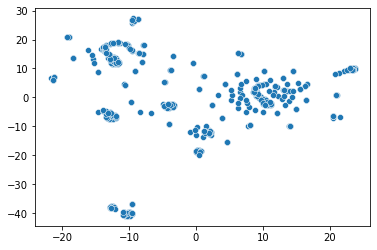

In [16]:
# Create a scatterplot of the t-SNE results
sns.scatterplot(x=tsne_features.T[0], y=tsne_features.T[1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<AxesSubplot:xlabel='k', ylabel='inertia'>

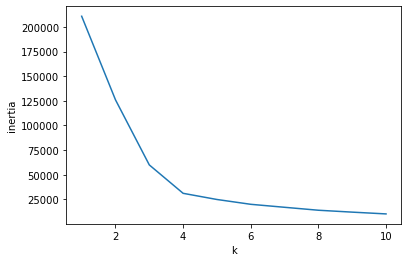

In [31]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tSNE_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve plot with seaborn
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
sns.lineplot(data=df_elbow, x='k', y='inertia', ci=68)